In [1]:
import cv2
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
)

In [28]:
# Load the noisy image and mask
image_path = "C:/Users/ASUS/OneDrive/Desktop/Platter food/plate 3.jpg"  
mask_path = "C:/Users/ASUS/OneDrive/Desktop/Platter food/plate 3_mask.jpg"  

In [29]:
noisy_image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

In [30]:
# Define a function to preprocess noisy images (e.g., denoising)
def preprocess_image(image):
    # Perform denoising or other preprocessing steps here
    # For example, you can use OpenCV functions like cv2.fastNlMeansDenoising()
    # Here, we will just convert the image to grayscale for simplicity
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocess the noisy image to reduce noise
preprocessed_image = preprocess_image(noisy_image)

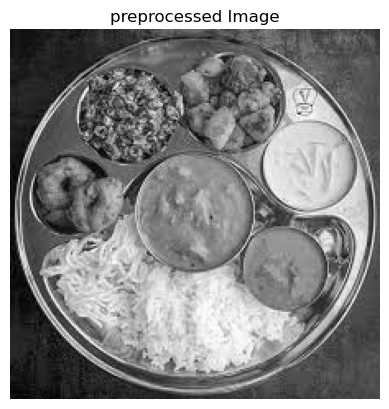

In [31]:
A
plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
plt.title('preprocessed Image')
plt.axis('off')
plt.show()

In [32]:
# Convert the mask to binary (0 and 1) Understand why we do this???
mask_binary = (mask / 255).astype(np.uint8)

In [33]:
# Perform image segmentation (e.g., using thresholding)
# You can replace this with your desired segmentation algorithm(Thresholding, OTus's, WaterSheild etc..)
_, segmented_image = cv2.threshold(preprocessed_image, 128, 255, cv2.THRESH_BINARY)

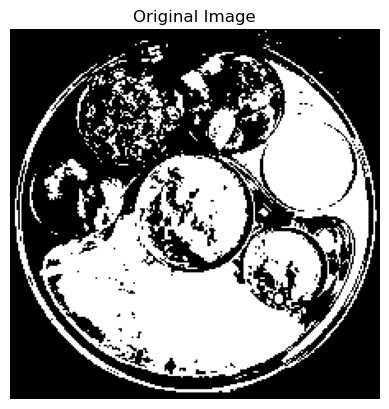

In [34]:
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

In [35]:
# Calculate evaluation metrics, Understand Analyse How it works step by step every functios
accuracy = accuracy_score(mask_binary.flatten(), (segmented_image / 255).astype(np.uint8).flatten())
precision = precision_score(mask_binary.flatten(), (segmented_image / 255).astype(np.uint8).flatten(), zero_division=1)
recall = recall_score(mask_binary.flatten(), (segmented_image / 255).astype(np.uint8).flatten(), zero_division=1)
f1 = f1_score(mask_binary.flatten(), (segmented_image / 255).astype(np.uint8).flatten(), zero_division=1)
confusion = confusion_matrix(mask_binary.flatten(), (segmented_image / 255).astype(np.uint8).flatten())
roc_auc = roc_auc_score(mask_binary.flatten(), segmented_image.flatten() / 255)

In [36]:
# Display evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.5760
Precision: 0.0594
Recall: 0.5736
F1-score: 0.1076
Confusion Matrix:
[[27865 20504]
 [  962  1294]]
ROC AUC Score: 0.5748


In [37]:
from sklearn.metrics import jaccard_score

# Calculate Intersection over Union (IoU)
intersection = np.logical_and(mask_binary, (segmented_image / 255).astype(np.uint8))
union = np.logical_or(mask_binary, (segmented_image / 255).astype(np.uint8))
iou = np.sum(intersection) / np.sum(union)

# Calculate Dice coefficient
dice = (2 * np.sum(intersection)) / (np.sum(mask_binary) + np.sum((segmented_image / 255).astype(np.uint8)))

print(f"Intersection over Union (IoU): {iou:.4f}")
print(f"Dice coefficient: {dice:.4f}")

Intersection over Union (IoU): 0.0569
Dice coefficient: 0.1076


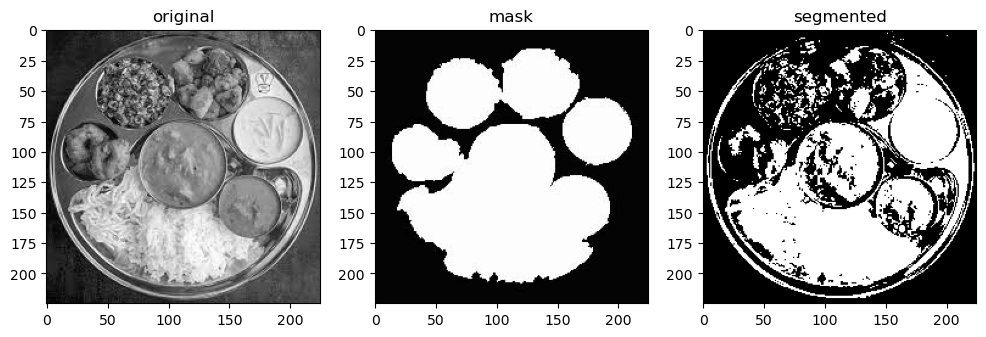

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB)), plt.title('original')
plt.subplot(132), plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)), plt.title('mask')
plt.subplot(133), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title('segmented')
plt.show()